In [115]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

In [117]:
data = pd.read_csv("car_price_dataset.csv")
data.head(5)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [119]:
y = data["Price"]
X = data.drop("Price", axis=1)
X.shape

(10000, 9)

In [121]:
print(X.isna().sum()) # all 0
print("________________________")
print(y.isna().sum()) # all 0

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
dtype: int64
________________________
0


In [48]:
# кодировка категориальных признаков
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(X[["Brand", "Model", "Fuel_Type", "Transmission"]])
feature_names = encoder.get_feature_names_out(["Brand", "Model", "Fuel_Type", "Transmission"])
encoded_df = pd.DataFrame(encoded_array, columns=feature_names)
X_encod = pd.concat([X.drop(["Brand", "Model", "Fuel_Type", "Transmission"], axis=1), encoded_df], axis=1)
X_encod.head(5)

,Year,Engine_Size,Mileage,Doors,Owner_Count,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2012,2.0,5356,2,3,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2020,4.2,231440,4,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2023,2.0,160971,2,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2003,2.6,286618,3,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [55]:
# потом можно подропать хуевую корреляцию 
corr = X_encod.corrwith(y)
corr.sort_values()

Mileage                       -0.551227
Fuel_Type_Petrol              -0.141650
Fuel_Type_Diesel              -0.136894
Transmission_Semi-Automatic   -0.133073
Transmission_Manual           -0.112186
Brand_Honda                   -0.020167
Model_Civic                   -0.020108
Brand_BMW                     -0.015938
Model_X5                      -0.015637
Model_5 Series                -0.011293
Model_RAV4                    -0.009928
Model_Camry                   -0.008223
Brand_Hyundai                 -0.007976
Model_Accord                  -0.006829
Model_CR-V                    -0.006773
Model_Sonata                  -0.006540
Brand_Toyota                  -0.005768
Model_Golf                    -0.005280
Model_Focus                   -0.004754
Model_Rio                     -0.004749
Model_Tucson                  -0.003786
Model_Elantra                 -0.003076
Model_Explorer                -0.002871
Brand_Ford                    -0.000043
Model_3 Series                 0.000107


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_encod, y, test_size=0.3, random_state=52)

In [70]:
# линейная регрессия без убирания плохой корреляции и скалирования данных
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mean_absolute_error(y_test, pred)

21.987039514729133

In [93]:
# табличка с кф
q = lr.coef_
feature_names = list(X_encod)
weights = pd.DataFrame({'Feature': feature_names, 'Weight': q})
weights

,Feature,Weight
0,Year,298.493086
1,Engine_Size,992.217026
2,Mileage,-0.019884
3,Doors,-0.090267
4,Owner_Count,-0.904196
5,Brand_Audi,-4.447727
6,Brand_BMW,-2.738644
7,Brand_Chevrolet,-1.924114
8,Brand_Ford,-0.629834
9,Brand_Honda,5.233624


In [104]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
pred_lasso = lr.predict(X_test)
mean_absolute_error(y_test, pred_lasso)

21.987039514729133

In [102]:
ridge = Ridge(alpha=2.0)
ridge.fit(X_train, y_train)
pred_ridge = lr.predict(X_test)
mean_absolute_error(y_test, pred_ridge)

21.987039514729133

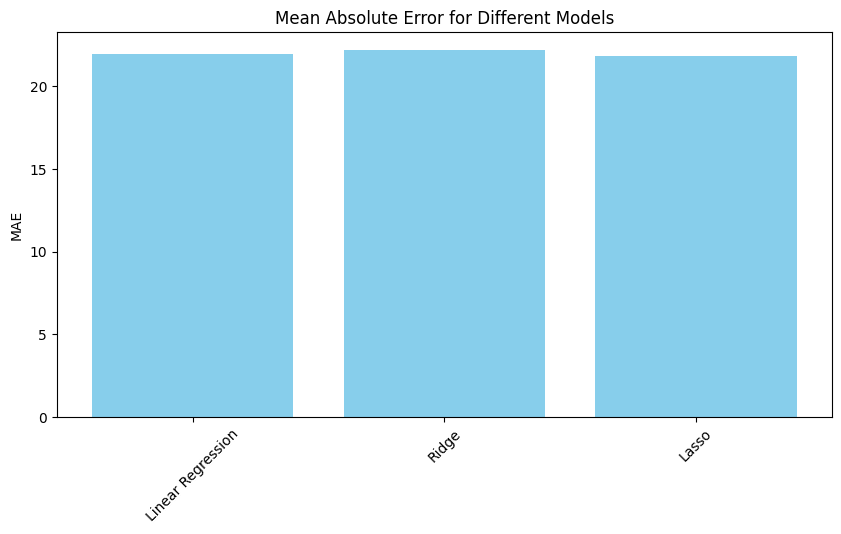

In [128]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)    
}
mae_scores = {}

# Обучаем модели и считаем MAE
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae_scores[name] = mean_absolute_error(y_test, y_pred)  

plt.figure(figsize=(10, 5))
plt.bar(mae_scores.keys(), mae_scores.values(), color="skyblue")
plt.ylabel("MAE")
plt.title("Mean Absolute Error for Different Models")
plt.xticks(rotation=45)
plt.show()